In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN,Dropout

In [764]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/hierarchical/data-preprocess.csv')
X = pd.read_csv('data/hierarchical/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [765]:
X_train = pd.read_csv('data/hierarchical/data-train.csv')
X_test = pd.read_csv('data/hierarchical/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [766]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [767]:
# y_train = to_categorical(y_train, num_classes=3)
# y_test = to_categorical(y_test, num_classes=3)

In [768]:
model = Sequential()
model.add(SimpleRNN(64,activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(3, activation='softmax'))

In [769]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2640 - val_loss: 0.0000e+00 - val_accuracy: 0.2266
Epoch 2/10
39/83 [=============>................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2268

c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3525 - val_loss: 0.0000e+00 - val_accuracy: 0.5045
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4346 - val_loss: 0.0000e+00 - val_accuracy: 0.4245
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4304 - val_loss: 0.0000e+00 - val_accuracy: 0.5483
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4728 - val_loss: 0.0000e+00 - val_accuracy: 0.4230
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4697 - val_loss: 0.0000e+00 - val_accuracy: 0.4230
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4622 - val_loss: 0.0000e+00 - val_accuracy: 0.4260
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4936 - val_loss: 0.0000e+0

In [770]:
accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
# y_pred = np.argmax(predictions, axis=1)

21/21 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5801
Accuracy:  [0.0, 0.5800604224205017]
21/21 [==============================] - 0s 938us/step


In [771]:
np.unique(predictions)

array([0.        , 0.8550452 , 0.8947462 , 0.94986075, 0.99035776,
       1.        ], dtype=float32)

In [772]:
y_pred = [0 if x <= 0.9 else (1 if 0.5 < x <= 1.0 else 2) for x in predictions]
np.unique(y_pred)

array([0, 1])

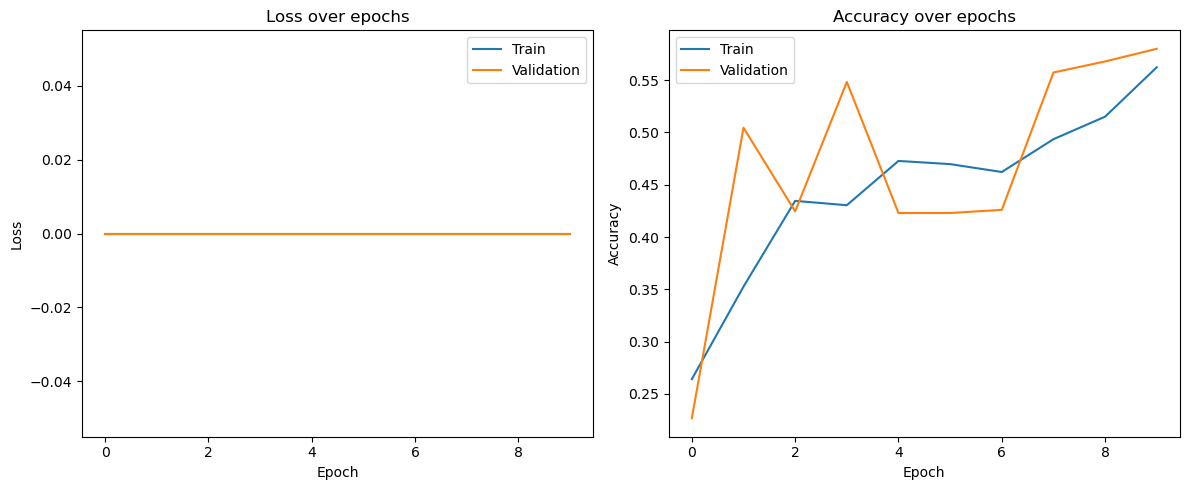

In [773]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.tight_layout()
plt.show()

In [774]:
# y_train = np.argmax(y_train, axis=1)
# y_test = np.argmax(y_test, axis=1)

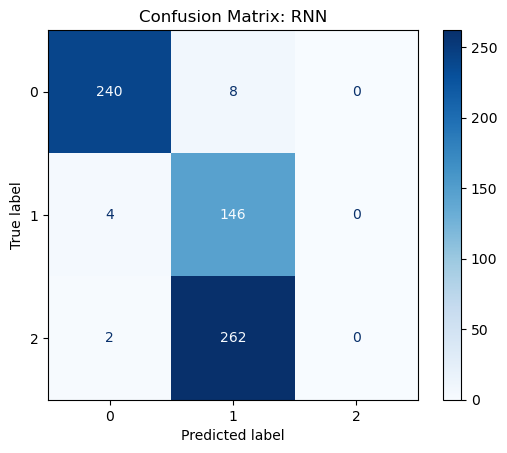

In [775]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [776]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       248
           1       0.35      0.97      0.52       150
           2       0.00      0.00      0.00       264

    accuracy                           0.58       662
   macro avg       0.44      0.65      0.50       662
weighted avg       0.45      0.58      0.48       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
